In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("redwine.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [4]:
df.duplicated().sum()

240

In [5]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [7]:
df.shape

(1359, 12)

<Axes: >

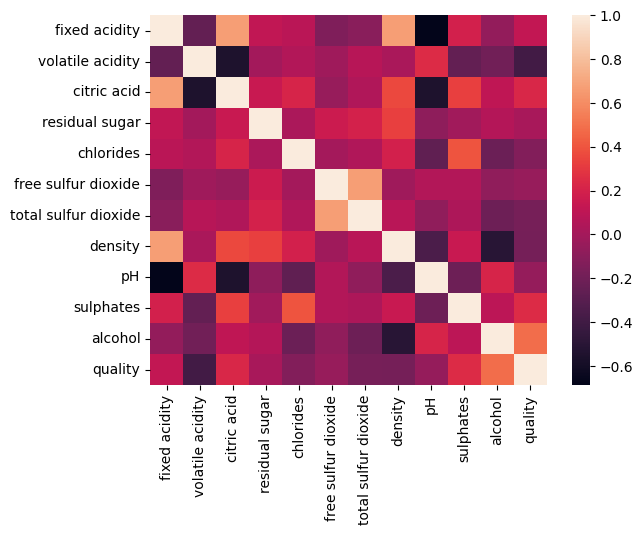

In [9]:
sns.heatmap(df.corr())

<Axes: ylabel='quality'>

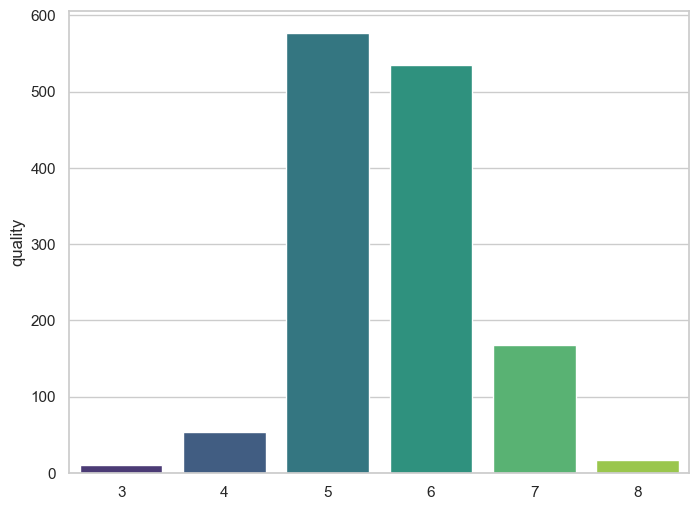

In [13]:
sns.set(style="whitegrid")  # Estilo de la rejilla blanca
plt.figure(figsize=(8, 6))   # Ajustar el tamaño de la figura si es necesario

# Utilizar barplot de seaborn
sns.barplot(x=df.quality.value_counts().index, y=df.quality.value_counts(), palette="viridis")


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [25]:
X = df.drop(columns=["quality"])
y = df["quality"]
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)

In [26]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [29]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Calcular métricas en el conjunto de entrenamiento
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

# Calcular métricas en el conjunto de prueba
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

# Mostrar métricas con mensajes
print("Métricas en el conjunto de entrenamiento:")
print(f"MAE: {mae_train:.4f}")
print(f"MSE: {mse_train:.4f}")
print(f"RMSE: {rmse_train:.4f}")
print(f"R^2: {r2_train:.4f}")
print("\nMétricas en el conjunto de prueba:")
print(f"MAE: {mae_test:.4f}")
print(f"MSE: {mse_test:.4f}")
print(f"RMSE: {rmse_test:.4f}")
print(f"R^2: {r2_test:.4f}")

Métricas en el conjunto de entrenamiento:
MAE: 0.5027
MSE: 0.4236
RMSE: 0.6508
R^2: 0.3723

Métricas en el conjunto de prueba:
MAE: 0.5330
MSE: 0.4710
RMSE: 0.6863
R^2: 0.3168


In [47]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [67]:
df["quality"].value_counts()

5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64

In [53]:
X = df[['fixed acidity','residual sugar', 'volatile acidity','total sulfur dioxide', 'density','pH', 'sulphates', 'alcohol']]

In [59]:
X = df.drop(columns=["quality"])
y = df["quality"]
# scaler = StandardScaler()
# X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)

In [60]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [64]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=500)

model.fit(X_train,y_train)

c:\Users\ZeeD\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=500)

In [65]:
from sklearn.metrics import accuracy_score 



y_pred = model.predict(X_test)

print('El score del modelo es:', accuracy_score(y_test, y_pred))

El score del modelo es: 0.5919117647058824


In [66]:
y_train_pred = model.predict(X_train)

# Calcular la precisión en el conjunto de entrenamiento
train_accuracy = accuracy_score(y_train, y_train_pred)
print('El score del modelo en el conjunto de entrenamiento es:', train_accuracy)

El score del modelo en el conjunto de entrenamiento es: 0.5906163753449862


In [73]:
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


X = df.drop('quality', axis=1)
y = df['quality']
scaler = StandardScaler()
X = scaler.fit_transform(X)
# Modelos
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Support Vector Regression': SVR()
}

# Evaluación mediante validación cruzada
for model_name, model in models.items():
    # Predicciones con validación cruzada
    y_pred = cross_val_predict(model, X, y, cv=5)
    
    # Calcular métricas
    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y, y_pred)
    
    # Imprimir métricas
    print(f'{model_name}:')
    print(f'  MAE: {mae:.4f}')
    print(f'  MSE: {mse:.4f}')
    print(f'  RMSE: {rmse:.4f}')
    print(f'  R^2: {r2:.4f}')
    print()

Linear Regression:
  MAE: 0.5175
  MSE: 0.4529
  RMSE: 0.6730
  R^2: 0.3318

Random Forest Regressor:
  MAE: 0.5163
  MSE: 0.4414
  RMSE: 0.6644
  R^2: 0.3488

Support Vector Regression:
  MAE: 0.5009
  MSE: 0.4414
  RMSE: 0.6644
  R^2: 0.3487



In [74]:
from sklearn.model_selection import cross_val_predict, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd


X = df.drop('quality', axis=1)
y = df['quality']

# Escalamiento de características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Modelos
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Gradient Boosting Regressor': GradientBoostingRegressor(),
    'Support Vector Regression': SVR()
}

# Hiperparámetros para Grid Search
param_grid = {
    'Random Forest Regressor': {'n_estimators': [50, 100, 200]},
    'Gradient Boosting Regressor': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]}
}


for model_name, model in models.items():
    # Grid Search para ajuste de hiperparámetros
    if model_name in param_grid:
        grid_search = GridSearchCV(model, param_grid[model_name], cv=5, scoring='neg_mean_absolute_error')
        grid_search.fit(X_scaled, y)
        model = grid_search.best_estimator_


    y_pred = cross_val_predict(model, X_scaled, y, cv=5)

    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y, y_pred)
    

    print(f'{model_name}:')
    print(f'  MAE: {mae:.4f}')
    print(f'  MSE: {mse:.4f}')
    print(f'  RMSE: {rmse:.4f}')
    print(f'  R^2: {r2:.4f}')
    print()

Linear Regression:
  MAE: 0.5175
  MSE: 0.4529
  RMSE: 0.6730
  R^2: 0.3318

Random Forest Regressor:
  MAE: 0.5152
  MSE: 0.4406
  RMSE: 0.6637
  R^2: 0.3500

Gradient Boosting Regressor:
  MAE: 0.5081
  MSE: 0.4318
  RMSE: 0.6571
  R^2: 0.3629

Support Vector Regression:
  MAE: 0.5009
  MSE: 0.4414
  RMSE: 0.6644
  R^2: 0.3487



In [100]:
from sklearn.tree import DecisionTreeClassifier

X = df.drop('quality', axis=1)
y = df['quality']

# Escalamiento de características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


decision_tree_model = DecisionTreeClassifier(
    max_depth=15,
    min_samples_split=4,
    min_samples_leaf=2,
    max_features=None,  # Puedes ajustar este valor según tus necesidades
    criterion='gini',  # También puedes probar 'entropy'
    class_weight=None,  # Puedes ajustar esto si tu conjunto de datos es desequilibrado
    random_state=77
)


y_pred = cross_val_predict(decision_tree_model, X, y, cv=5)


mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)


print(f'Decision Tree Regressor:')
print(f'  MAE: {mae:.4f}')
print(f'  MSE: {mse:.4f}')
print(f'  RMSE: {rmse:.4f}')
print(f'  R^2: {r2:.4f}')

Decision Tree Regressor:
  MAE: 0.6291
  MSE: 0.8646
  RMSE: 0.9298
  R^2: -0.2756


In [103]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict, GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


X = df.drop('quality', axis=1)
y = df['quality']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


knn_model = KNeighborsRegressor()


param_grid = {'n_neighbors': [3, 5, 7, 9, 11], 'weights': ['uniform', 'distance']}


grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)
best_knn_model = grid_search.best_estimator_


y_pred = best_knn_model.predict(X_test)


mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


print(f'Best k-Nearest Neighbors Regressor (Hiperparámetros óptimos):')
print(f'  MAE: {mae:.4f}')
print(f'  MSE: {mse:.4f}')
print(f'  RMSE: {rmse:.4f}')
print(f'  R^2: {r2:.4f}')



Best k-Nearest Neighbors Regressor (Hiperparámetros óptimos):
  MAE: 0.5032
  MSE: 0.4351
  RMSE: 0.6596
  R^2: 0.3857
